In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Nt = 100  # número de pontos de treinamento

x = np.round(np.random.uniform(0, 1, (Nt, 2)), 0)
d = 1 * (np.logical_and(x[:, [0]], x[:, [1]]))
# Poderia também usar .astype:
# d = np.logical_and(x[:, [0]], x[:, [1]]).astype(int)

In [ ]:
def Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb, dw):
    """
    W = Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb)
    x: sinal de entrada
    d: sinal desejado
    eta: passo de adaptação
    Nt: número de dados de treinamento
    Ne: número de épocas
    Nb: tamanho do mini-batch
    dw: desvio padrão para inicialização de w
    """
    """
    Novamente, vamos juntar o sinal de entrada e o sinal desejado em um único vetor, 
    uma vez que a cada época vamos embaralhar os dados.
    Ao fazer isso, já inserimos uma coluna de 1's para levar em conta o bias.
    """

    M = x.shape[1]
    Nmb = int(np.floor(Nt / Nb))
    W = dw * np.random.uniform(-1, 1, (Ne * Nmb + 1, M + 1))    
    Xd = np.hstack((np.ones((Nt, 1)), x, d))

    # No modo mini-batch, o passo de adaptação é dividido por Nb
    eta = eta / Nb
    for k in range(Ne):
        np.random.shuffle(Xd)
        x = Xd[:, 0 : M + 1]
        d = Xd[:, [M + 1]]
        for l in range(Nmb):
            m = k * Nmb + l
            dmb = d[l * Nb : (l + 1) * Nb]
            xmb = x[l * Nb : (l + 1) * Nb, :]
            emb = dmb - np.heaviside(xmb @ W[[m], :].T, 1)
            Gmb = xmb.T @ emb            
            W[[m + 1], :] = W[[m], :] + eta * Gmb.T

    return W

In [ ]:
eta = 0.1  # passo de adaptação do algoritmo de Rosenblatt
M = 2  # número de pesos (Notar que não consideramos bias neste problema)
Nb = 20
Ne = 100
dw = 2
W = Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb, dw)
it_final = Ne * int(np.floor(Nt / Nb))
Wfinal = W[[it_final], :]
print(Wfinal)

[[-0.31568323  0.30105117  0.03617617]]


Text(0.5, 0, 'iterações')

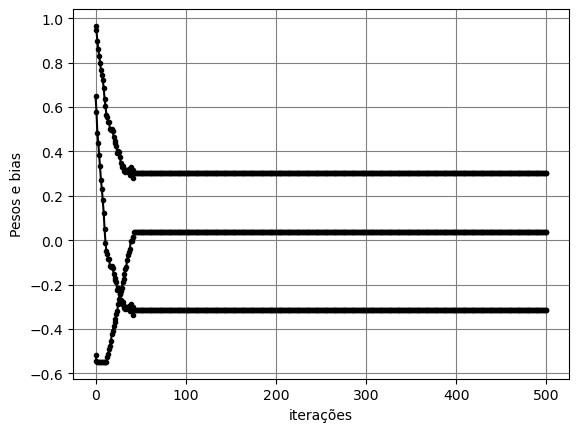

In [ ]:
plt.figure()
# Mostra os valores dos pesos ao longo das épocas
plt.plot(W, ".-k", label="Rosenblatt")
plt.ylabel("Pesos e bias")
plt.grid(axis="x", color="0.5")
plt.grid(axis="y", color="0.5")
plt.xlabel("iterações")

Taxa de erro: 0.0


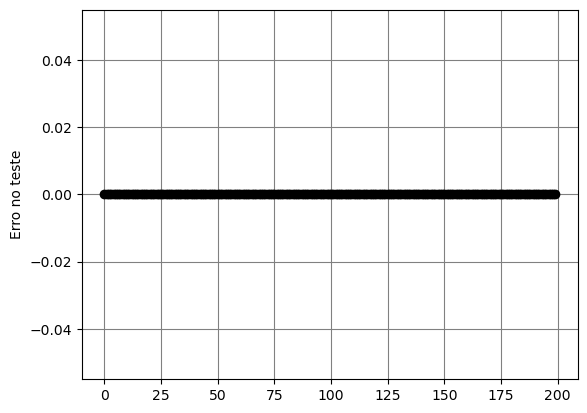

In [ ]:
Nteste = 200
# vetor de 1s para levar em conta o bias
b = np.ones((Nteste, 1))

xteste = np.round(np.random.uniform(0, 1, (Nteste, 2)), 0)
xteste = np.hstack((b, xteste))
dteste = 1 * (np.logical_and(xteste[:, [1]], xteste[:, [2]]))
yteste = np.heaviside(xteste @ Wfinal.T, 1)
eteste = dteste - yteste
plt.figure()
plt.plot(np.absolute(eteste), "ok", label="Rosenblatt")
Taxa_de_erro = np.sum(np.absolute(eteste)) * 100 / Nteste
print(f"Taxa de erro: {Taxa_de_erro}")
plt.ylabel("Erro no teste")
plt.grid(axis="x", color="0.5")
plt.grid(axis="y", color="0.5")

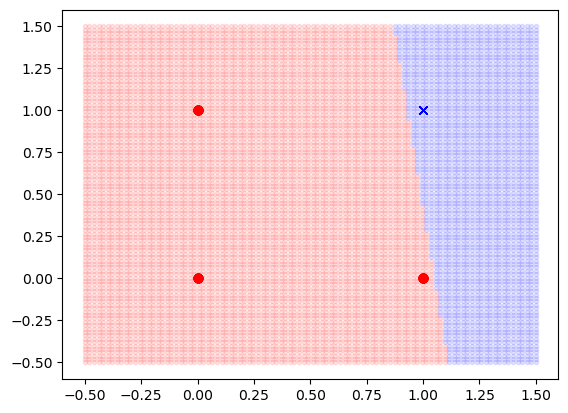

In [ ]:
# Gera a curva de separação das duas regiões
# Dados da curva de separação
Nsep = 100
x1S = np.linspace(-0.5, 1.5, Nsep).reshape(-1, 1)
x2S = np.linspace(-0.5, 1.5, Nsep).reshape(-1, 1)

# Gera pontos da grade
xx1S, xx2S = np.meshgrid(x1S, x2S)
xx1S = xx1S.reshape(-1, 1)
xx2S = xx2S.reshape(-1, 1)

# Gera array x 
xgrid = np.hstack((xx1S, xx2S))
Ngrid = len(xgrid)
b = np.ones((Ngrid, 1))
xgrid = np.hstack((b, xgrid))

# Calcula saída para cada ponto da grade
ygrid = np.heaviside(xgrid @ Wfinal.T, 1)

# Plota os pontos principais
fig, ax2 = plt.subplots()
for i in range(Nteste):
    if dteste[i] == 1:
        ax2.plot(xteste[i, 1], xteste[i, 2], "xb")
    else:
        ax2.plot(xteste[i, 1], xteste[i, 2], "or")

# Plota pontos da grade com saída 0 (usa transparência alpha)        
l0 = np.where(ygrid == 0)[0]
ax2.plot(xgrid[l0, 1], xgrid[l0, 2], "r.", alpha=0.1)

# Plota pontos da grade com saída 1 (usa transparência alpha)
l1 = np.where(ygrid == 1)[0]
ax2.plot(xgrid[l1, 1], xgrid[l1, 2], "b.", alpha=0.1)